# Importar librerías

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [20]:
tarea_df = pd.read_csv('tarea.csv')

In [21]:
tarea_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,labels
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [22]:
imgs = tarea_df.drop(['labels'], axis = 1).to_numpy().reshape(-1,8,8,1)   
labels = tarea_df['labels'].values

In [23]:
imgs.shape #forma de tensor

(1797, 8, 8, 1)

In [24]:
labels.shape

(1797,)

# Visualizar las imágenes

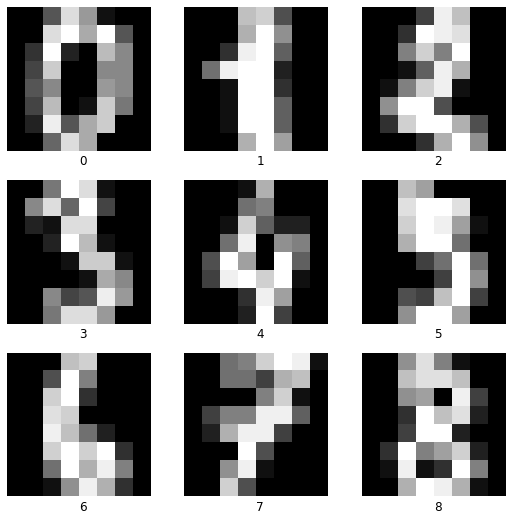

In [25]:
ncols, nrows = 3, 3
fig = plt.gcf() #get current figure, si no hay, se crea
fig.set_size_inches(ncols*3, nrows*3) #tamaño de la figura
for i in range(ncols*nrows): #iterar para mostrar
    sp = plt.subplot(nrows, ncols, i+1) #subplots
    plt.imshow(imgs[i], cmap = 'gray') #escala de grises
    sp.axis('Off')
    sp.text(0.5, -0.1, labels[i], size = 12, transform=sp.transAxes)

# Dividir data de entrenamiento y testing

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(imgs,labels , test_size = 0.2, random_state = 42)

In [27]:
X_train.shape, X_valid.shape

((1437, 8, 8, 1), (360, 8, 8, 1))

# Dar formato al dataset

In [28]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
STEPS_PER_EPOCH = int(X_train.shape[0] / BATCH_SIZE)
VALID_STEPS = int(X_valid.shape[0] / BATCH_SIZE)
NUM_EPOCHS = 20

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat(NUM_EPOCHS)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE).repeat(NUM_EPOCHS)

# Modelo de CNN

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', padding = 'same', input_shape = (8,8,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 16)          160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 8,714
Trainable params: 8,714
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

In [40]:
history = model.fit(train_dataset, epochs = NUM_EPOCHS,
          batch_size = BATCH_SIZE,
          steps_per_epoch = STEPS_PER_EPOCH,
          validation_data = valid_dataset,
          validation_steps = VALID_STEPS)

Epoch 1/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0031 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9801
Epoch 2/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0031 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9773
Epoch 3/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0146 - sparse_categorical_accuracy: 0.9957 - val_loss: 0.0812 - val_sparse_categorical_accuracy: 0.9830
Epoch 4/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0049 - sparse_categorical_accuracy: 0.9986 - val_loss: 0.0580 - val_sparse_categorical_accuracy: 0.9915
Epoch 5/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0555 - val_sparse_categorical_accuracy: 0.9915
Epoch 6/20
44/44 [==============================] - 0s 2ms/step - loss: 8.8488e-04 - sparse_categorical_accura

In [35]:
model.evaluate(valid_dataset)

240/240 [==============================] - 0s 1ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9917


[0.057401690632104874, 0.9916666746139526]

Text(0.5, 1.0, 'Loss de training y validation')

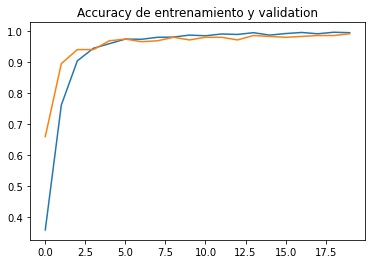

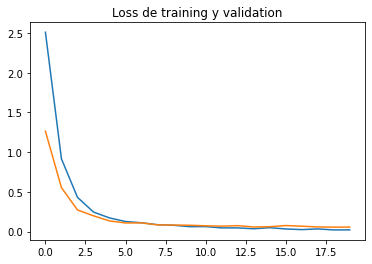

In [36]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plotear el acc  de training y validation

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy de entrenamiento y validation')

plt.figure()
#Plotear el loss por epoch

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss de training y validation')